In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Conv2D, Flatten, Dropout, Dense, MaxPooling2D, AveragePooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
xtrain_path = "X_train_sat4.csv"
ytrain_path = "y_train_sat4.csv"
xtest_path = "X_test_sat4.csv"
ytest_path = "y_test_sat4.csv"

Read training data and labels and display training images

In [3]:
x_train = pd.read_csv(xtrain_path)
y_train = pd.read_csv(ytrain_path)

In [10]:
x_trainmat = x_train.as_matrix()
y_trainmat = y_train.as_matrix()
print ("no of training examples of size 28*28*4",x_trainmat.shape[0])

no of training examples of size 28*28*4 399999


C:\Users\s164255\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\s164255\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [12]:
x_trainmat = x_trainmat.reshape([399999,28,28,4])

Barren land


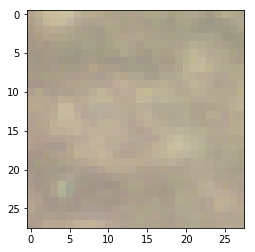

In [31]:
imageno = 200
plt.imshow(x_trainmat[imageno,:,:,0:3])
if(y_trainmat[imageno,0]==1):
    print("Barren land")
elif(y_trainmat[imageno,1]==1):
    print("trees")
elif(y_trainmat[imageno,2]==1):
    print("grassland")
else:
    print("other")

We will use the LeNet-5 architecture. We’ll also use add dropout layers in between. Dropout regularizes the networks, i.e. it prevents the network from overfitting. All our layers have relu activations except the output layer. Output layer uses softmax activation as it has to output the probability for each of the classes.

Sequential is a keras container for linear stack of layers. To attach a fully connected layer (aka dense layer) to a convolutional layer, we will have to reshape/flatten the output of the conv layer. This is achieved by Flatten layer

In [38]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3,3), activation='relu', input_shape =(28,28,4)))
model.add(AveragePooling2D())
          
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(AveragePooling2D())
          
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(4, activation='softmax'))
        


Instructions for updating:
Colocations handled automatically by placer.


In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 6)         222       
_________________________________________________________________
average_pooling2d_1 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

In [42]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

Fitting the model

In [43]:
EPOCHS = 10
BATCH_SIZE = 128
model.fit(x_trainmat, y_trainmat, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 319999 samples, validate on 80000 samples
Epoch 1/10
319999/319999 [==============================] - 133s 416us/step - loss: 0.7448 - acc: 0.8715 - val_loss: 0.1165 - val_acc: 0.9614
Epoch 2/10
319999/319999 [==============================] - 115s 360us/step - loss: 0.1189 - acc: 0.9585 - val_loss: 0.1006 - val_acc: 0.9646
Epoch 3/10
319999/319999 [==============================] - 115s 359us/step - loss: 0.0924 - acc: 0.9677 - val_loss: 0.0775 - val_acc: 0.9741
Epoch 4/10
319999/319999 [==============================] - 114s 357us/step - loss: 0.0794 - acc: 0.9720 - val_loss: 0.0743 - val_acc: 0.9740
Epoch 5/10
319999/319999 [==============================] - 115s 359us/step - loss: 0.0692 - acc: 0.9756 - val_loss: 0.0579 - val_acc: 0.9801
Epoch 6/10
319999/319999 [==============================] - 122s 381us/step - loss: 0.0638 - acc: 0.9778 - val_loss: 0.1047 - val_acc: 0.9632
Epoch 7/10
319999/319999 [=======================

In [44]:
x_test = pd.read_csv(xtest_path)
y_test = pd.read_csv(ytest_path)
x_test = x_test.as_matrix()


C:\Users\s164255\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[[[164, 139, 111, 196],
         [171, 147, 122, 201],
         [168, 139, 114, 197],
         ...,
         [171, 139, 109, 198],
         [171, 140, 112, 197],
         [172, 142, 116, 197]],

        [[165, 144, 115, 197],
         [169, 142, 115, 197],
         [165, 138, 110, 196],
         ...,
         [174, 145, 118, 199],
         [184, 160, 136, 208],
         [176, 147, 122, 199]],

        [[163, 136, 109, 193],
         [164, 139, 109, 195],
         [175, 152, 124, 202],
         ...,
         [169, 136, 109, 193],
         [170, 142, 115, 195],
         [186, 159, 140, 207]],

        ...,

        [[173, 147, 122, 200],
         [174, 149, 126, 201],
         [170, 144, 120, 198],
         ...,
         [159, 129,  94, 191],
         [159, 128,  95, 191],
         [170, 141, 115, 199]],

        [[170, 145, 115, 200],
         [164, 136, 108, 195],
         [174, 151, 127, 202],
         ...,
         [170, 141, 112, 198],
         [170, 144, 116, 200],
         

In [46]:
x_test = x_test.reshape([99999,28,28,4])
preds = model.predict(x_test)

In [50]:
preds.shape
y_test.shape

(99999, 4)

trees
true trees


C:\Users\s164255\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
C:\Users\s164255\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


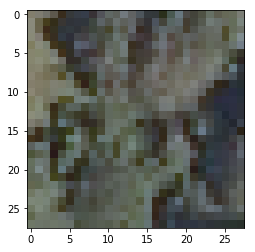

In [67]:
imageno = 200
plt.imshow(x_test[imageno,:,:,0:3])
if(preds[imageno,0]==1):
    print("Barren land")
elif(preds[imageno,1]==1):
    print("trees")
elif(preds[imageno,2]==1):
    print("grassland")
else:
    print("other")

if(y_test.as_matrix()[imageno,0]==1):
    print("true Barren land")
elif(y_test.as_matrix()[imageno,1]==1):
    print("true trees")
elif(y_test.as_matrix()[imageno,2]==1):
    print("true grassland")
else:
    print("true other")

In [85]:
A=np.round(preds)
B = y_test.values
np.sum((A == B).all(1))/99999

0.984989849898499